In [49]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error

# Read in the load factor data
df = pd.read_csv('data/load_factor_data.csv')

# Append date column
df = pd.read_csv('timeseries_loadfactor.csv').drop('organization_code_iata.1', axis = 1).drop('Unnamed: 1', axis = 1)

# date_dataset = date_dataset['continuous']
# df = pd.concat([df, date_dataset], axis = 1)
df

,organization_code_iata,organization_code_icao,period_start_date,period_end_date,accounting_period,passenger_load_factor_pct,continuous,type
0,2I,SRU,2017-02-01,2017-02-28,Month 2,0.000000,1,Cargo
1,2I,SRU,2017-03-01,2017-03-31,Month 3,0.000000,2,Cargo
2,2I,SRU,2017-04-01,2017-04-30,Month 4,0.000000,3,Cargo
3,2I,SRU,2017-05-01,2017-05-31,Month 5,0.000000,4,Cargo
4,2I,SRU,2017-06-01,2017-06-30,Month 6,0.000000,5,Cargo
...,...,...,...,...,...,...,...,...
10263,ZW,AWI,2021-05-01,2021-05-31,Month 5,82.203939,52,Regional
10264,ZW,AWI,2021-06-01,2021-06-30,Month 6,82.998898,53,Regional
10265,ZW,AWI,2021-07-01,2021-07-31,Month 7,85.040905,54,Regional
10266,ZW,AWI,2021-08-01,2021-08-31,Month 8,83.057336,55,Regional


In [2]:
# Load in validation data
df_val = pd.read_csv('data/validation.csv')

In [50]:
# Airline iata
airline = "R3"

# Filter the data to only include the airline
df = df[df['organization_code_iata'] == airline]
df_val = df_val[df_val['organization_code_iata'] == airline]

# Convert the date column to a datetime object
df['period_start_date'] = pd.to_datetime(df['period_start_date'])
df_val['time'] = pd.to_datetime(df_val['time'])

df

C:\Users\Oscar\AppData\Local\Temp\ipykernel_19852\4159496797.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_start_date'] = pd.to_datetime(df['period_start_date'])


,organization_code_iata,organization_code_icao,period_start_date,period_end_date,accounting_period,passenger_load_factor_pct,continuous,type
7313,R3,SYL,2017-02-01,2017-02-28,Month 2,71.396060,1,Mainline
7314,R3,SYL,2017-03-01,2017-03-31,Month 3,76.339567,2,Mainline
7315,R3,SYL,2017-04-01,2017-04-30,Month 4,82.556705,3,Mainline
7316,R3,SYL,2017-05-01,2017-05-31,Month 5,75.994624,4,Mainline
7317,R3,SYL,2017-06-01,2017-06-30,Month 6,83.451626,5,Mainline
7318,R3,SYL,2017-07-01,2017-07-31,Month 7,92.079004,6,Mainline
7319,R3,SYL,2017-08-01,2017-08-31,Month 8,92.427789,7,Mainline
7320,R3,SYL,2017-09-01,2017-09-30,Month 9,89.369087,8,Mainline
7321,R3,SYL,2017-10-01,2017-10-31,Month 10,88.372792,9,Mainline
7322,R3,SYL,2017-11-01,2017-11-30,Month 11,64.822390,10,Mainline


In [51]:
# Prepare data for Prophet
data = df.reset_index().rename(columns={'period_start_date': 'ds', 'passenger_load_factor_pct': 'y'})
data["covid"] = (data["ds"] >= "2020-03-01") & (data["ds"] <= "2021-6-30")
data['cap'] = 100
data['floor'] = 0

data

,index,organization_code_iata,organization_code_icao,ds,period_end_date,accounting_period,y,continuous,type,covid,cap,floor
0,7313,R3,SYL,2017-02-01,2017-02-28,Month 2,71.396060,1,Mainline,False,100,0
1,7314,R3,SYL,2017-03-01,2017-03-31,Month 3,76.339567,2,Mainline,False,100,0
2,7315,R3,SYL,2017-04-01,2017-04-30,Month 4,82.556705,3,Mainline,False,100,0
3,7316,R3,SYL,2017-05-01,2017-05-31,Month 5,75.994624,4,Mainline,False,100,0
4,7317,R3,SYL,2017-06-01,2017-06-30,Month 6,83.451626,5,Mainline,False,100,0
5,7318,R3,SYL,2017-07-01,2017-07-31,Month 7,92.079004,6,Mainline,False,100,0
6,7319,R3,SYL,2017-08-01,2017-08-31,Month 8,92.427789,7,Mainline,False,100,0
7,7320,R3,SYL,2017-09-01,2017-09-30,Month 9,89.369087,8,Mainline,False,100,0
8,7321,R3,SYL,2017-10-01,2017-10-31,Month 10,88.372792,9,Mainline,False,100,0
9,7322,R3,SYL,2017-11-01,2017-11-30,Month 11,64.822390,10,Mainline,False,100,0


22:28:41 - cmdstanpy - INFO - Chain [1] start processing
22:28:42 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

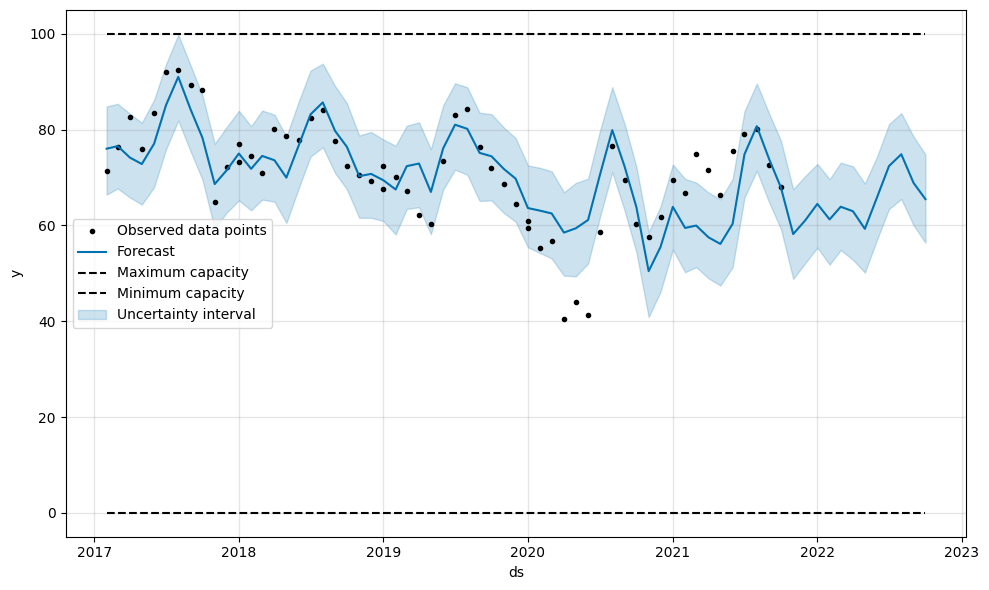

In [48]:
# Fit the model
model = Prophet(growth='logistic')
model.add_regressor("covid")
model.fit(data)

# Make predictions (Data is in 1 month intervals)
future = model.make_future_dataframe(periods=12, freq='MS')
future["covid"] = (future["ds"] >= "2020-03-01") & (future["ds"] <= "2021-6-30")
future['cap'] = 100
future['floor'] = 0



forecast = model.predict(future)

#future = model.make_future_dataframe(periods=365)
#forecast = model.predict(future

# Plot the results
fig = model.plot(forecast, include_legend=True)

# Use sklearn to calculate the MSE for the validation data

# Intersect the validation data with the forecast data
# forecast.ds == df_val.time merge
df_val = df_val.merge(forecast, left_on='time', right_on='ds')

# Calculate the MSE with sklearn
y_actual = df_val['passenger_load_factor_pct']
y_pred = df_val['trend']

print("MSE: ", mean_squared_error(y_actual, y_pred))
